## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [3]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
print(df.target.value_counts())
df.target = df.target.replace('<=50K',0).replace('>50K',1)
df.info()

 <=50K    24720
 >50K      7841
Name: target, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [6]:
df.isna().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [7]:
#code
print(df.isin([' ?']).sum(axis=0))


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64


Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [8]:
#code
same = df[(df["workclass"]==" ?") & (df["occupation"]==" ?")]
same.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 27 to 32542
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education-num   1836 non-null   int64 
 5   marital-status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital-gain    1836 non-null   int64 
 11  capital-loss    1836 non-null   int64 
 12  hours-per-week  1836 non-null   int64 
 13  native-country  1836 non-null   object
 14  target          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

In [9]:
print()

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

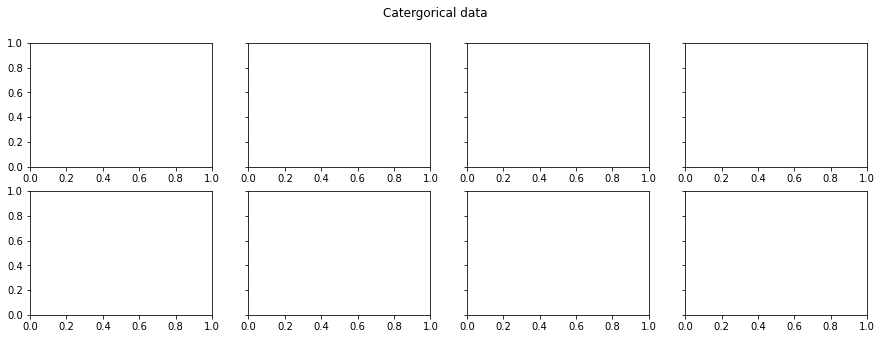

In [11]:
caters = ['workclass', 'occupation', 'education', 'race', 'sex', 'relationship', 'native-country','marital-status']
i = 0 
#plot the categroical columns to see what we are dealing with
fig, axes = plt.subplots(2, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Catergorical data')

#for c in caters:
    #sns.countplot(ax=axes[i], x=c, data=df)
   # axes[i].set_title(c)
   # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
   # i += 1
# workclass
sns.countplot(ax=axes[0], x='workclass', data=df)
axes[0].set_title("WorkClass")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)
# occupation
sns.countplot(ax=axes[1], x='occupation', data=df)
axes[1].set_title("Occupation")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)
# education
sns.countplot(ax=axes[2], x='education', data=df)
axes[2].set_title("Education")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=75)
# education
sns.countplot(ax=axes[3], x='race', data=df)
axes[3].set_title("Race")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=75)

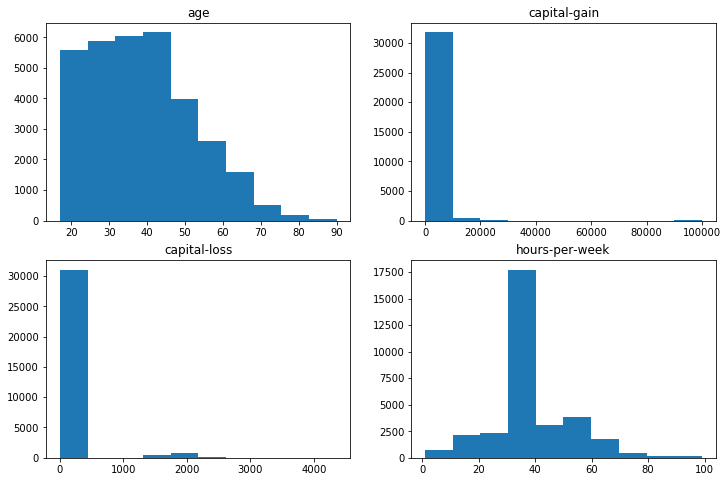

In [ ]:
#plot the numerical columns


#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [12]:
df_drop_all = df[(df["workclass"]!=" ?") & (df["occupation"]!=" ?") & (df["native-country"]!=" ?")]
#train / test... you know the dril
df_replace = df.replace(" ?",np.nan)
df_replace.workclass = df_replace['workclass'].fillna(df_replace['workclass'].mode()[0])
df_replace['occupation'] =df_replace['occupation'].fillna(df_replace['occupation'].mode()[0])
df_replace['native-country'] =df_replace['native-country'].fillna(df_replace['native-country'].mode()[0])

X_dr = df_drop_all.iloc[:,:-1]
X_dr = pd.get_dummies(X_dr)
y_dr = df_drop_all.target

X_re = df_replace.iloc[:,:-1]
X_re = pd.get_dummies(X_re)
y_re = df_replace.target

X_dr_train, X_dr_test, y_dr_train, y_dr_test = train_test_split(X_dr, y_dr)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, y_re)


In [17]:
svc_drop = SVC()
svc_drop.fit(X_dr_train, y_dr_train)
print("Droped value score: {:.2f}%".format(svc_drop.score(X_dr_test, y_dr_test)*100))
svc_rep = SVC()
svc_rep.fit(X_re_train, y_re_train)
print("Replaced value score: {:.2f} %".format(svc_drop.score(X_re_test, y_re_test)*100))

Droped value score: 79.45%


ValueError: X.shape[1] = 105 should be equal to 104, the number of features at training time

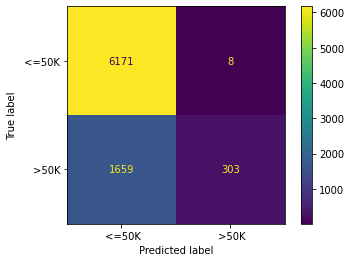

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_rep,X_re_test, y_re_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_dr = RandomForestClassifier()
rf_re = RandomForestClassifier()
rf_dr.fit(X_dr_train, y_dr_train)
rf_re.fit(X_re_train, y_re_train)


RandomForestClassifier()

In [15]:
print("Forest Score dropped: {:.2f}%".format(rf_dr.score(X_dr_test, y_dr_test)*100))
print("Forest repaced values: {:.2f}%".format(rf_re.score(X_re_test, y_re_test)*100))

Forest Score dropped: 85.04%
Forest repaced values: 84.95%


# Discussion of results